(notes:eda)=
# Exploratory Data Analysis
Exploratory data analysis, or EDA, is a standard practice prior to any data manipulation and analysis.

Recall that data engineering is primarily about data preparation to *serve* smooth and effective data analysis.  Exploratory data analysis generally refers to the step of understanding the data:  
- **summarizing characteristics of raw data**
- **visualizing data (single and multiple variables)**
- identifying missing data
- identifying outliers

This document primarily deals with the first two items.  

## Goals
In the **exploratory** phase, these are for people behind the scenes to see.  

The main goals here are:
- capture main message
- (relatively) quick exploration across many summaries (including plots)
- *not* intended for a client or presentation

What does this translate to, technically?
- each summary should have meaningful information
- **label** your plots

## Data summary
As a starting point, simply looking at the data is worth the while.  Some common questions to consider are the following:  


1. General dataset info: size, dtypes  
2. Missing values?  
3. Duplicate data?  
4. Continuous variables  
5. Categorical variables  
6. Bivariate relationships  
7. Potential data quality issues, e.g., inconsistency, special NA characters

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

```{figure} ../img/sns.jpg

---
width: 50%
name: sns
---

The origin of sns.
```

In [4]:
# return all available datasets in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
# load and save a copy of the diamonds dataset
diam = sns.load_dataset('diamonds', cache=True, data_home='dataset/')

In [7]:
# take a glimpse of the data
diam.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# view a summary of the full data
diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
# checks for duplicates (also ask if duplicates make sense)
diam.duplicated().any()

True

In [12]:
# duplicates
diam[diam.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [13]:
# a quick numerical summary 
diam.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
# checks for possible statistical assumption(s)
import scipy.stats as sps

In [15]:
# extract only numeric variables
diam_num = diam.select_dtypes('number')

In [17]:
diam_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# for example, normality test
sps.normaltest(diam_num)

NormaltestResult(statistic=array([ 8926.7378275 ,  6613.70177994,  8034.75173835, 15096.64975977,
        3120.2536999 , 40315.99314718, 28986.64011404]), pvalue=array([0., 0., 0., 0., 0., 0., 0.]))

In [18]:
# for example, another normality test
[sps.shapiro(diam_num.iloc[:, i]) for i in range(diam_num.shape[1])]

C:\Users\moses\.venv\de300\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[ShapiroResult(statistic=0.8938943147659302, pvalue=0.0),
 ShapiroResult(statistic=0.9531666040420532, pvalue=0.0),
 ShapiroResult(statistic=0.9539790153503418, pvalue=0.0),
 ShapiroResult(statistic=0.798107922077179, pvalue=0.0),
 ShapiroResult(statistic=0.9565654397010803, pvalue=0.0),
 ShapiroResult(statistic=0.9186360836029053, pvalue=0.0),
 ShapiroResult(statistic=0.9338123798370361, pvalue=0.0)]

In [19]:
# pairwise correlation
diam_num.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## Data visualization

In [20]:
sns.set(context='talk', style='ticks')  # simply for aesthetics
sns.set_palette('magma_r')
%matplotlib inline 

diam = diam.sample(n=1500)  # for illustration purposes

<Axes: ylabel='Frequency'>

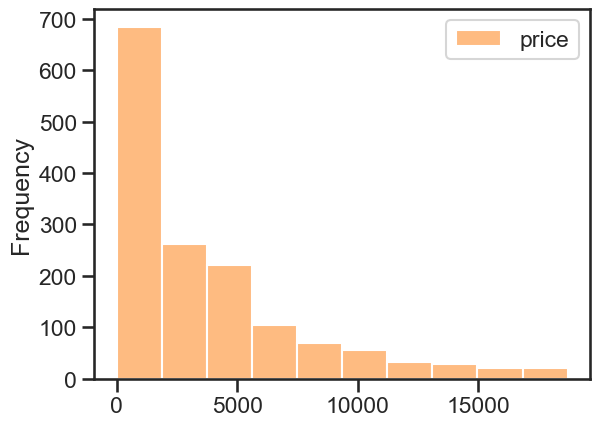

In [21]:
# histogram for continuous variables using pandas built-in plots 
diam.plot.hist(column='price')

<Axes: xlabel='price', ylabel='Probability'>

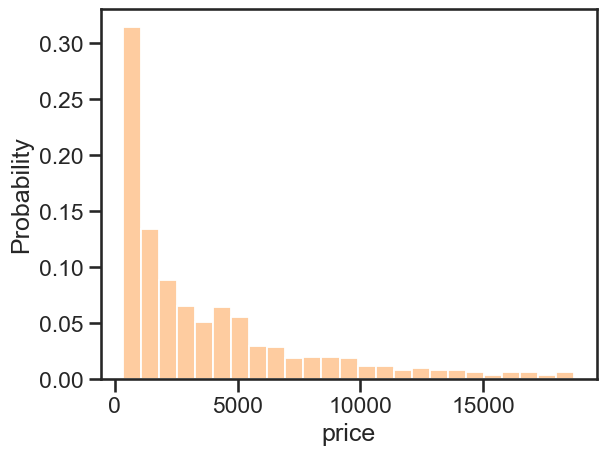

In [23]:
# relative frequency? ...
sns.histplot(x='price', data=diam, stat='probability')

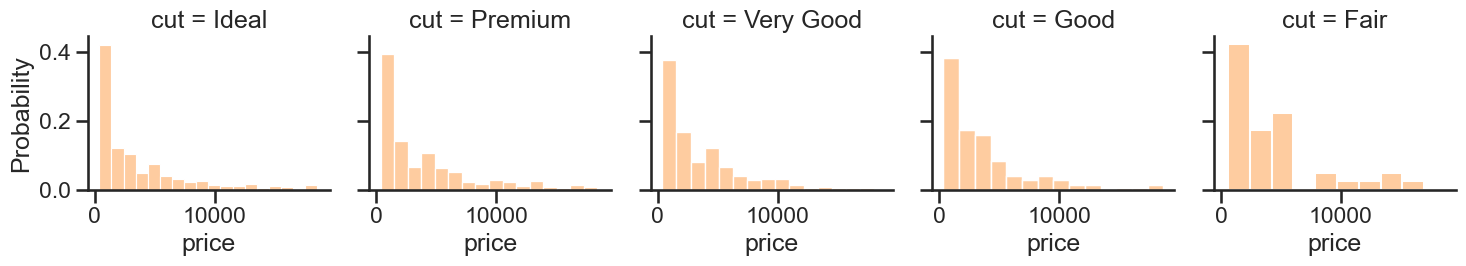

In [24]:
# histogram of prices by group
g = sns.FacetGrid(diam, col='cut')
g.map(sns.histplot, 'price', stat='probability')

C:\Users\moses\.venv\de300\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


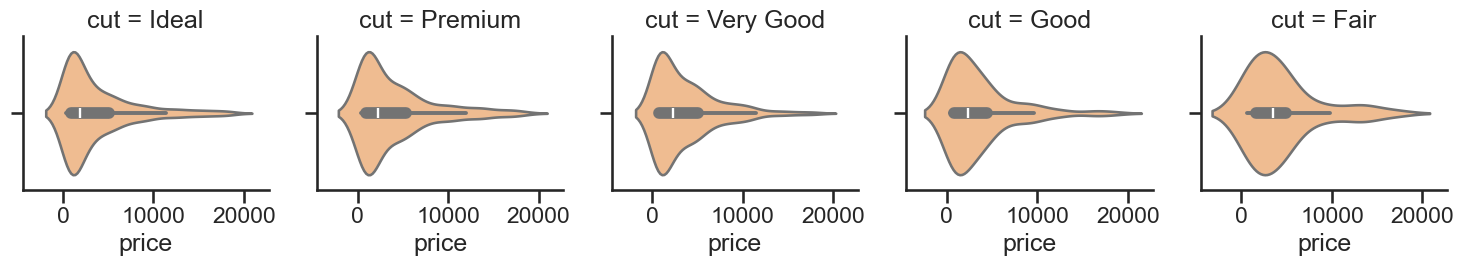

In [25]:
# other types of plots
g = sns.FacetGrid(diam, col='cut')
g.map(sns.violinplot, 'price')

<Axes: xlabel='cut', ylabel='count'>

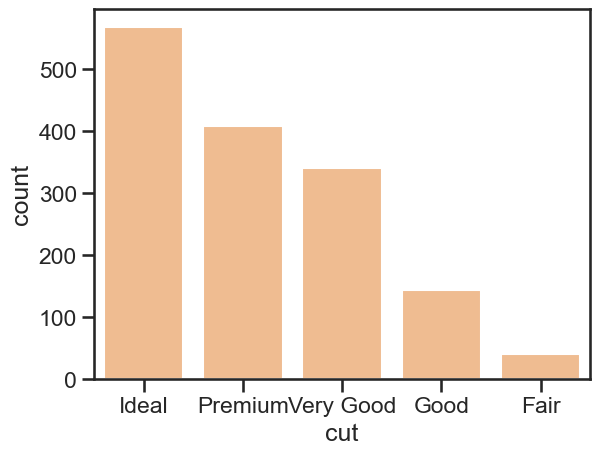

In [26]:
# counts for categorical variables
sns.countplot(x='cut', data=diam)  #  hue='cut', 

<Axes: xlabel='cut', ylabel='price'>

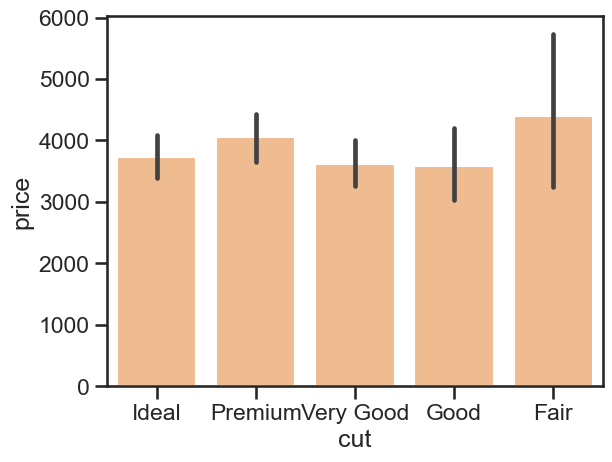

In [27]:
sns.barplot(x='cut', y='price', data=diam)  # hue='cut', 

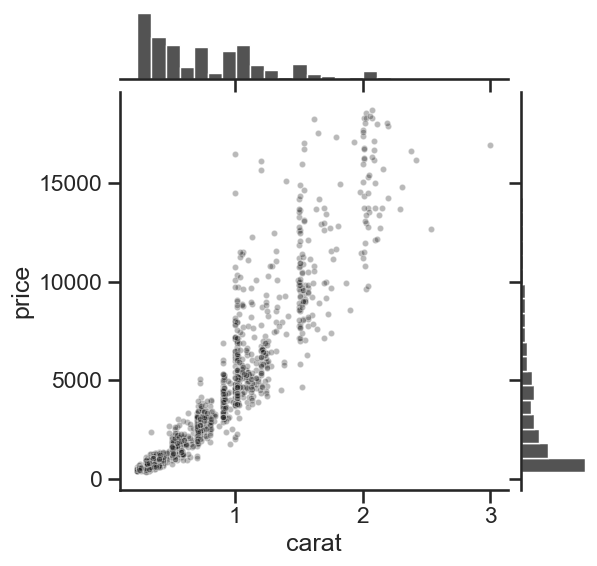

In [28]:
# bivariate plots
sns.jointplot(x='carat', y='price', data=diam, alpha=.3, color='k', marker='.')

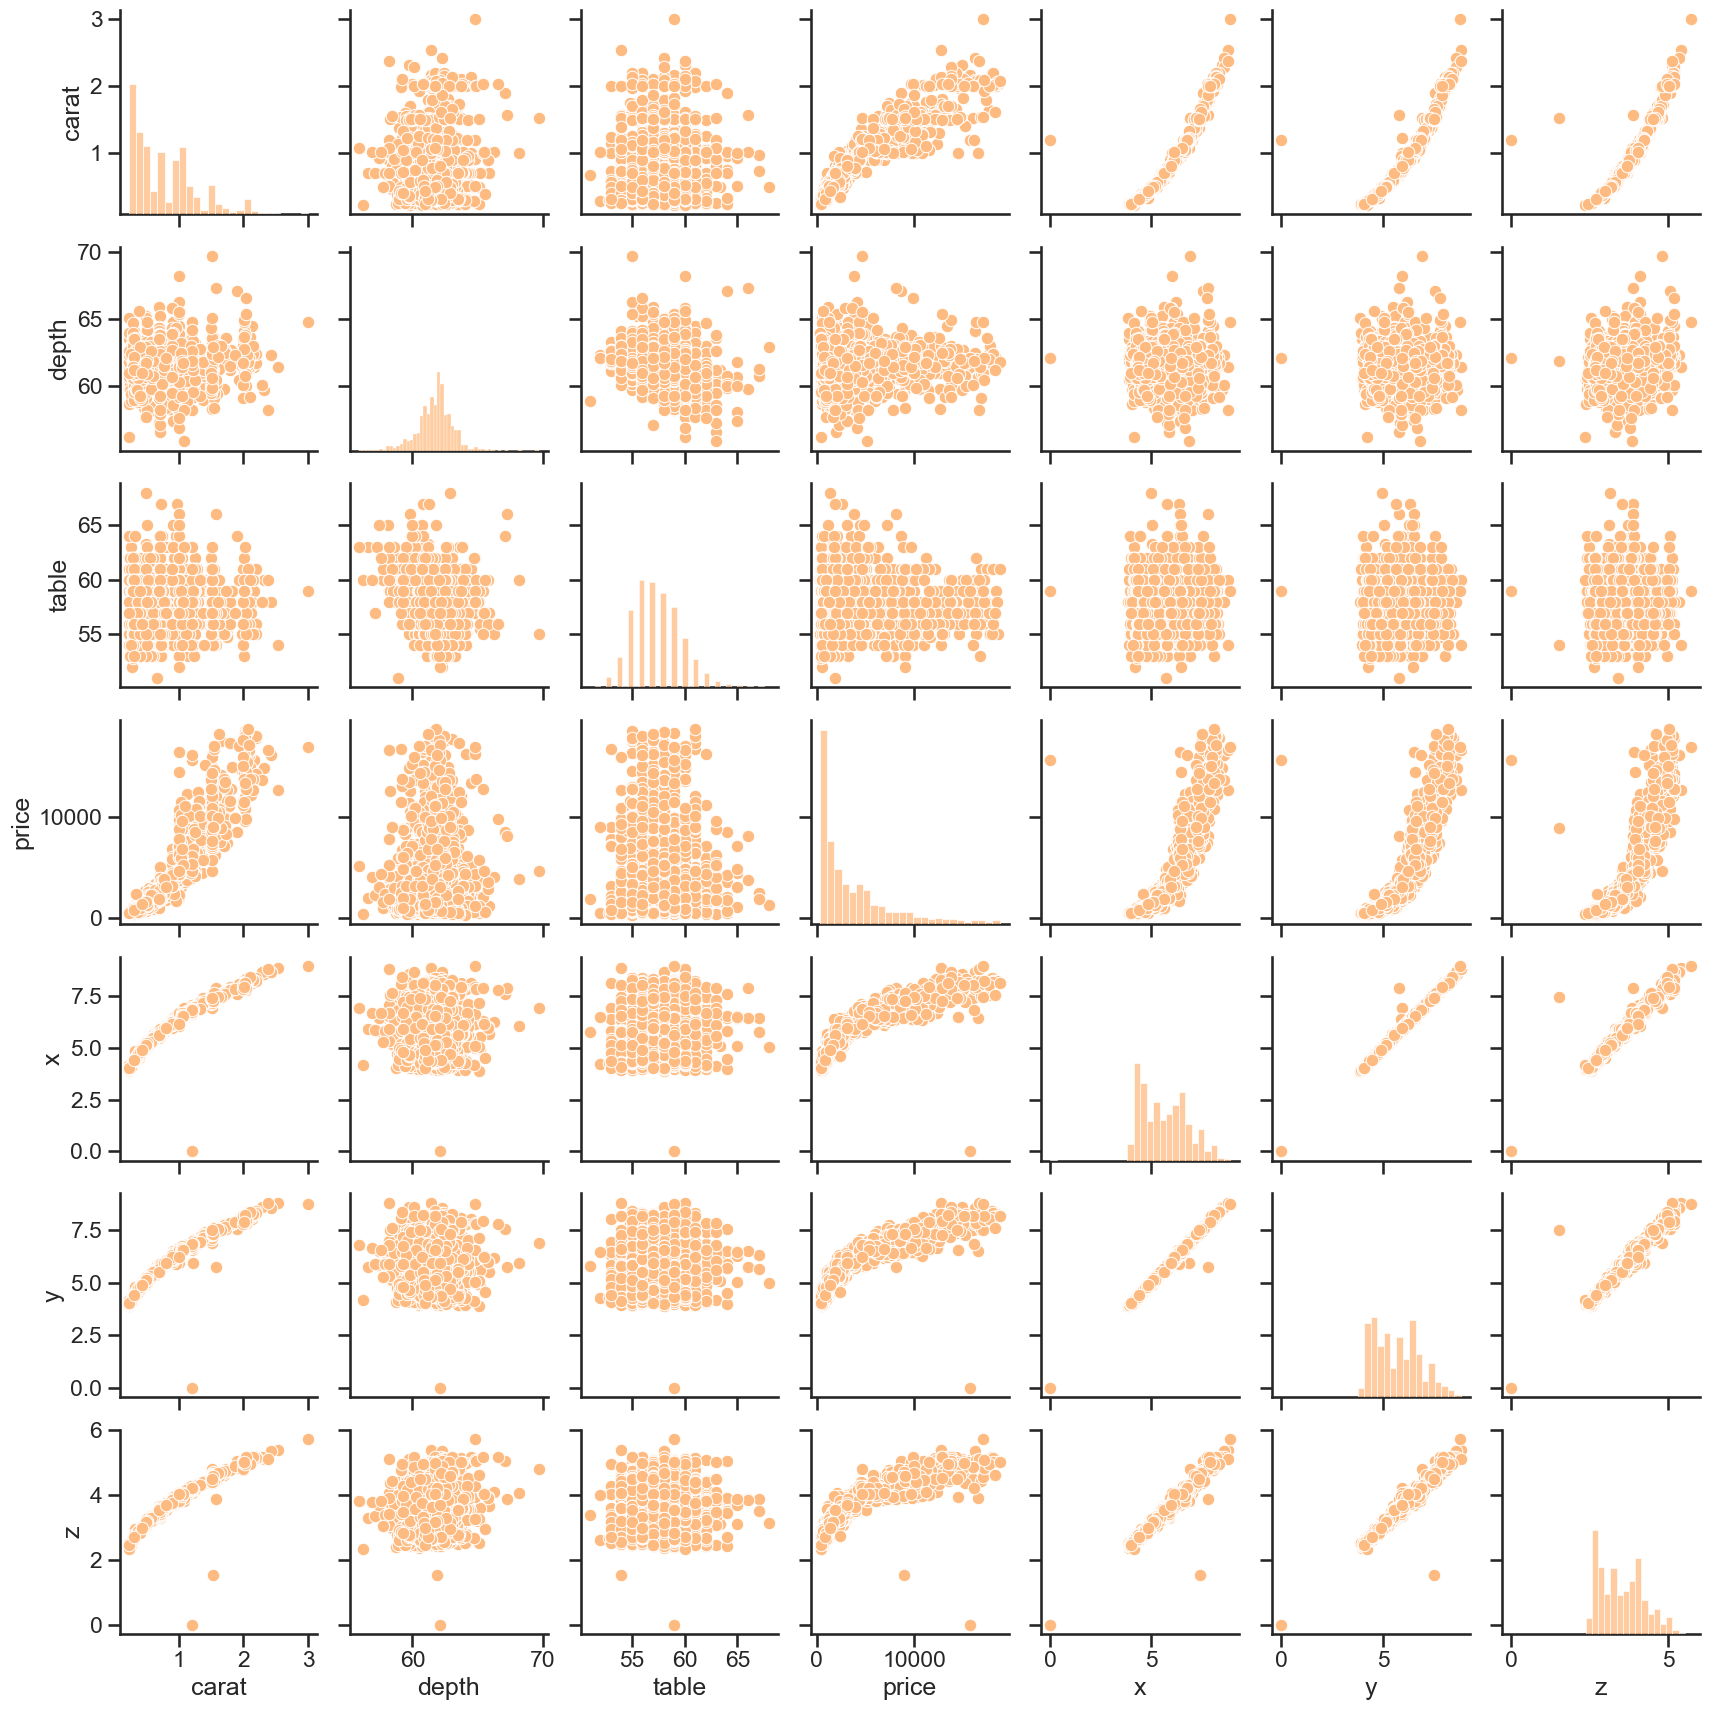

In [29]:
# pairwise plots  (time-consuming)
g = sns.pairplot(diam)

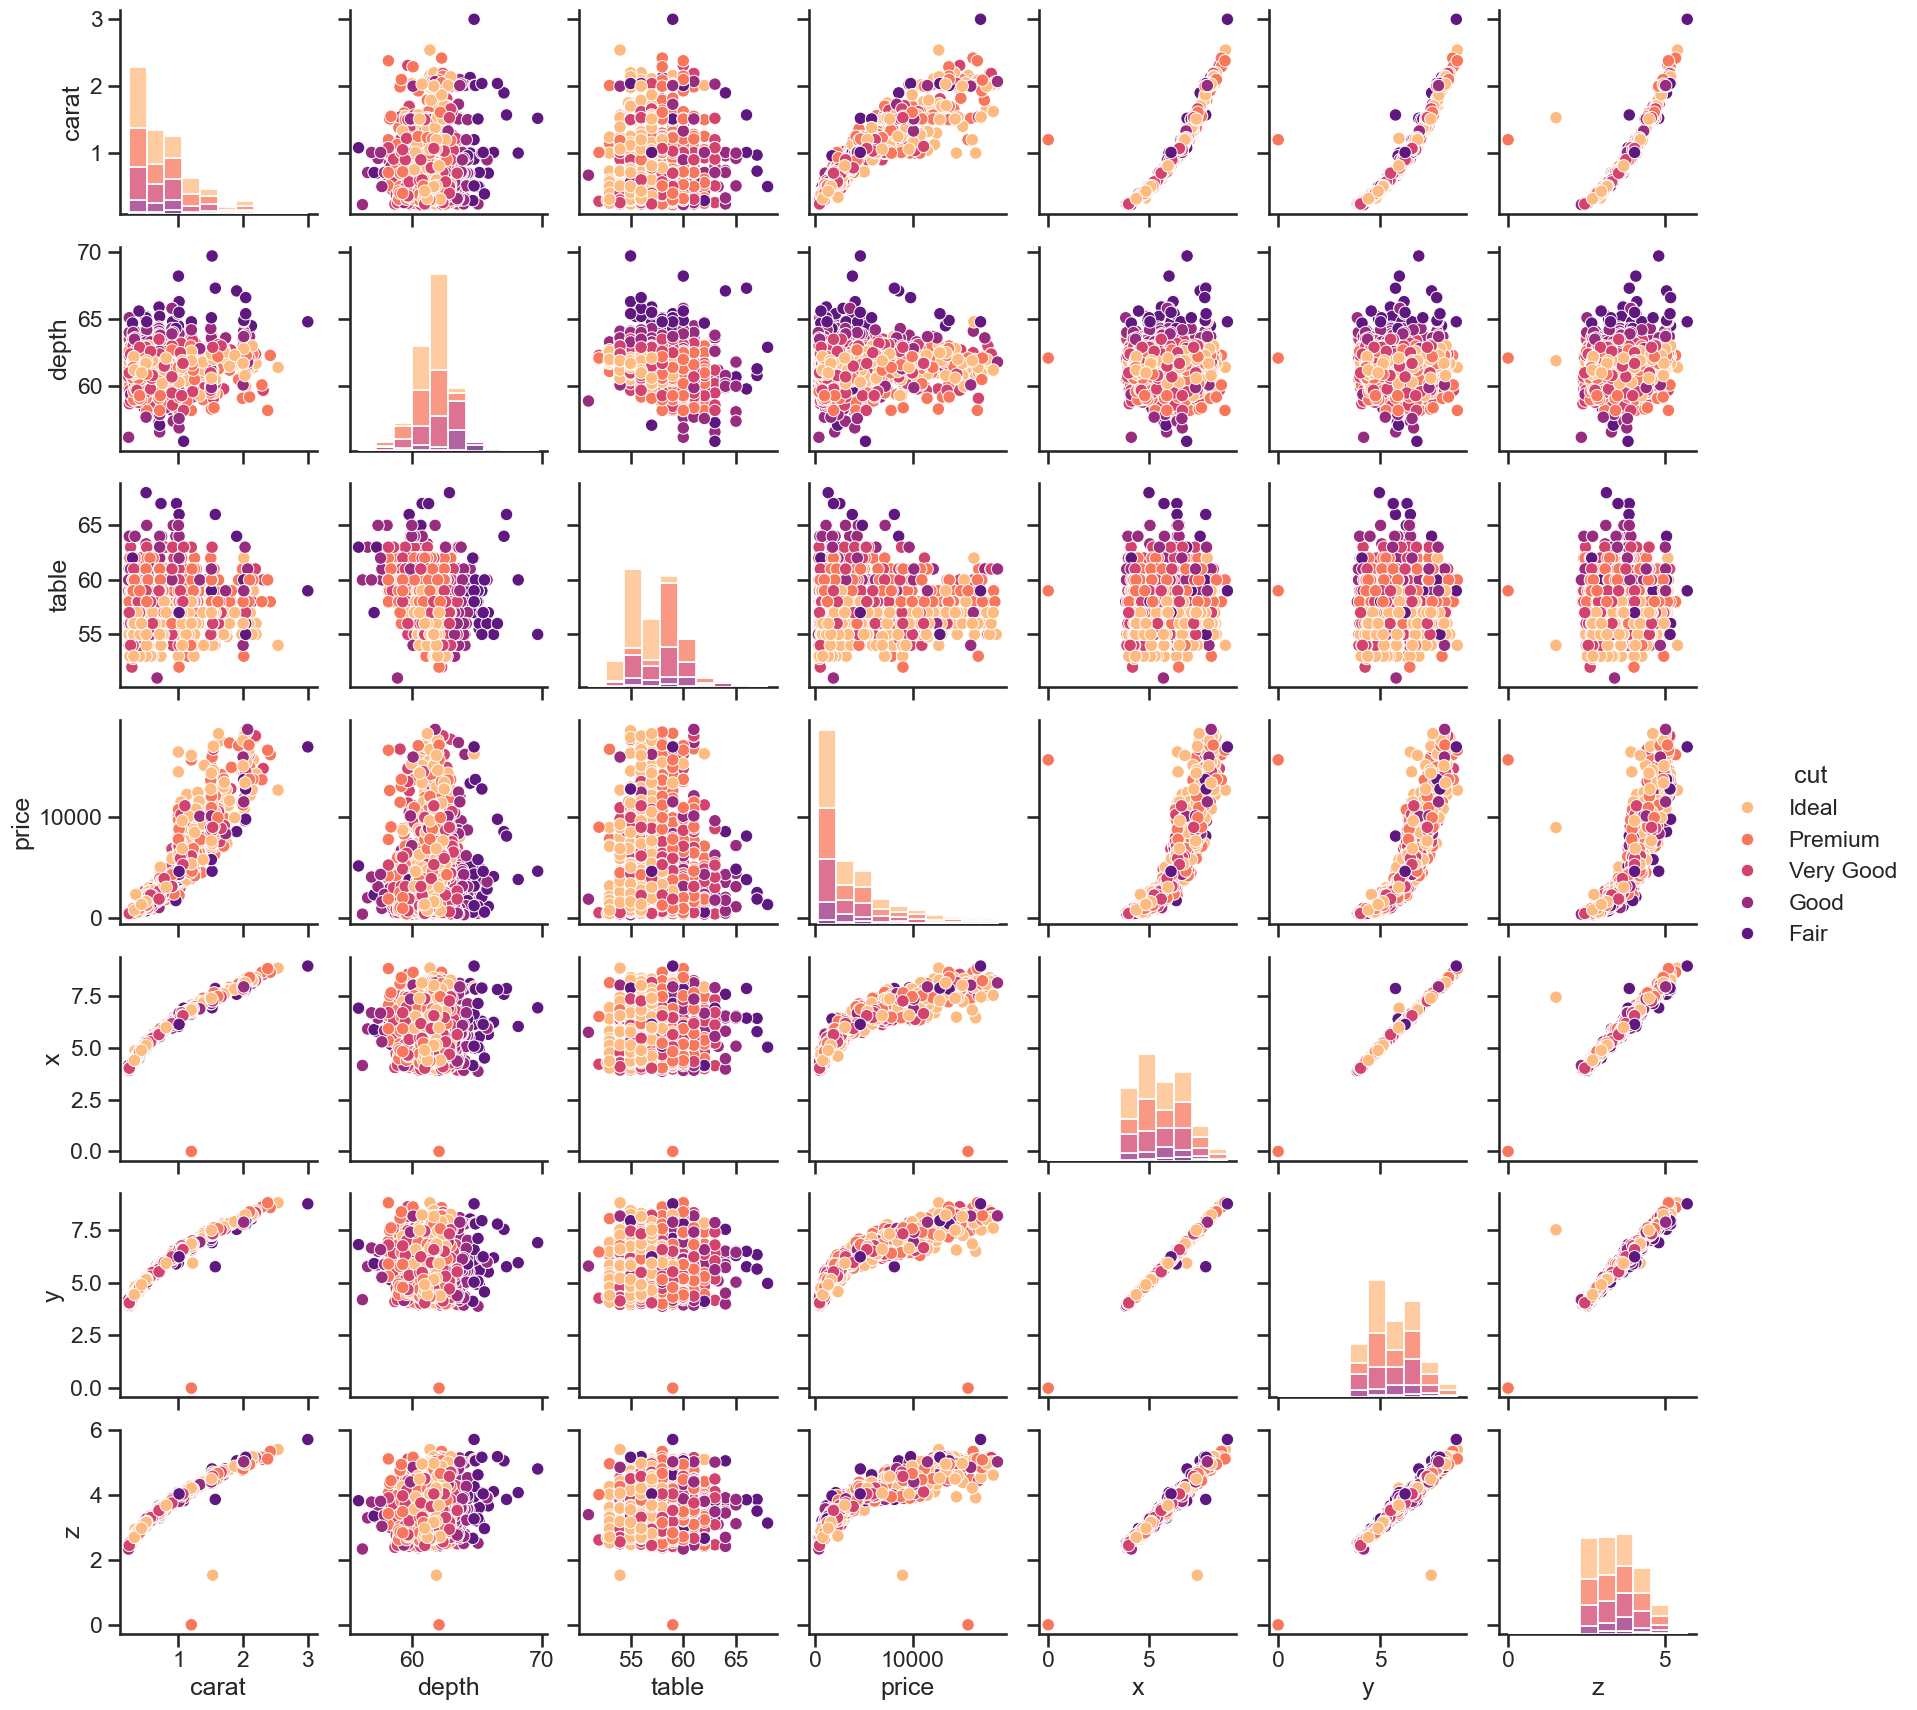

In [30]:
g = sns.pairplot(diam, hue='cut', 
                 diag_kind='hist', diag_kws={'multiple': 'stack', 'bins': 10})

# (Exercise) Penguins data

We may dive into the penguins dataset as an exercise.

Example questions:

- Practice on some of the exploratory questions above
- How many penguins are in the dataset for each species? 
- Do the penguin sizes differ by species, or where they live?
- If we were to build a statistical model for the "size" of penguins, how might we approach this?

In [66]:
penguins = sns.load_dataset('penguins', cache=True, data_home='dataset')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## (In case you need this) Jupyter notebook setup

Visit https://docs.jupyter.org/en/latest/install/notebook-classic.html for some guidance to set up jupyter notebook.


---

*Note:* These notes are adapted from a blog post on [Tom's Blog](https://tomaugspurger.net/posts/modern-6-visualization/).
